In [1]:

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('insurance.csv')


Michael Woodburn: I'm seeking to explore and improve upon the work done by the great Dandelion https://www.kaggle.com/hely333/eda-regression/notebook in her analysis of insurance costs.

Dandelion:
Today we will explore a data set dedicated to the cost of treatment of different patients.  The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis.
In any case, I wish you to be healthy!


In [2]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

A good day is when there is no "NaN"in the data :D
Let's look at our data to understand something about it.
Since we are primarily interested in the amount of costs see what posts are more correlated with charges. For a start, we will encode categorical features.


In [4]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 

LabelEncoder()

In [5]:
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)

In [6]:
#region
#le.fit(data.region.drop_duplicates()) 
#data.region = le.transform(data.region)
"""A few words about coding "region". In general, categorical variables with large variability are best encoded using OneHotEncoder and so on.  
But in this case, nothing will change, because there is no special order in which the regions would be listed. So I'm being very lazy only used the Label Encoder."" - Dandelion """



'A few words about coding "region". In general, categorical variables with large variability are best encoded using OneHotEncoder and so on.  \nBut in this case, nothing will change, because there is no special order in which the regions would be listed. So I\'m being very lazy only used the Label Encoder."" - Dandelion '

I think it's reasonable to one-hot-encode the regions.

In [7]:
r_dummies = pd.get_dummies(data.region)
len(r_dummies)


1338

In [8]:
data_encoded = pd.concat((data,r_dummies),axis=1)

In [9]:
data = data_encoded

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [17]:
scaler = StandardScaler()

x = data.drop(['charges','region'], axis = 1)
y = data.charges

X = scaler.fit_transform(x)



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.884129348260403


Nice, so scaling the data first does improve R2. So now, what about going cubic? Our best result so far is 0.884129348260403.

In [20]:
scaler = StandardScaler()

x = data.drop(['charges','region'], axis = 1)
y = data.charges

x = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0);

In [44]:
NN = MLPRegressor(max_iter = 2000,learning_rate = 'adaptive', learning_rate_init = 0.01)
NN.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=20000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [45]:
NN.n_iter_

13397

In [46]:
print(NN.score(x_train, y_train))
#print(NN.score(x_val, y_val))
print(NN.score(x_test, y_test))


0.8158118628596454
0.8606841552037668


In [47]:
preds = NN.predict(x_train)

In [48]:
r2_score(y_train,preds)

0.8158118628596454

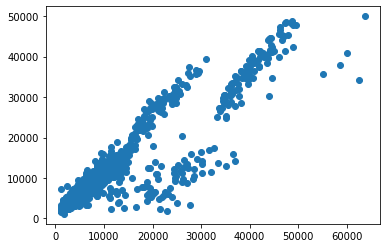

In [49]:
plt.scatter(y_train,preds)

In [51]:
NN = MLPRegressor(max_iter = 2000,learning_rate = 'adaptive', learning_rate_init = 0.01,n_iter_no_change=100)
NN.fit(x_train, y_train)
print(NN.n_iter_)
print('train score is ',NN.score(x_train, y_train))
#print(NN.score(x_val, y_val))
print('val score is ', NN.score(x_test, y_test))


2000
train score is  0.8335832859044785
val score is  0.8779264050165463


In [52]:
NN = MLPRegressor(max_iter = 20000,learning_rate = 'adaptive', learning_rate_init = 0.01,n_iter_no_change=100)
NN.fit(x_train, y_train)
print(NN.n_iter_)
print('train score is ',NN.score(x_train, y_train))
#print(NN.score(x_val, y_val))
print('val score is ', NN.score(x_test, y_test))


4719
train score is  0.8331884083301245
val score is  0.8829008463342767


So by using a neural network my final score is only slightly less than the ideal polynomial. And that's with only a little tinkering with my parameters. This great result makes me wonder what else I might achieve. Perhaps with a slightly more complex NN?

In [57]:
NN = MLPRegressor(hidden_layer_sizes = (100,1000,20), max_iter = 2000,learning_rate = 'adaptive', learning_rate_init = 0.01, n_iter_no_change=100, early_stopping=True)
NN.fit(x_train, y_train)
print(NN.n_iter_)
print('train score is ',NN.score(x_train, y_train))
#print(NN.score(x_val, y_val))
print('val score is ', NN.score(x_test, y_test))

273
train score is  0.8490795223030465
val score is  0.8795557658407891


An almost imperceptible increase in accuracy on most runs.

In [58]:
NN = MLPRegressor(early_stopping=True,hidden_layer_sizes = (100,1000,20), max_iter = 2000,learning_rate = 'adaptive', learning_rate_init = 0.01, n_iter_no_change=200)
NN.fit(x_train, y_train)
print(NN.n_iter_)
print('train score is ',NN.score(x_train, y_train))
#print(NN.score(x_val, y_val))
print('val score is ', NN.score(x_test, y_test))

407
train score is  0.8557913627634572
val score is  0.884937891766023


With a validation score = 0.884937891766023, this is the first time I've achieved supremacy with a NN. I'm very happy with this result, as I haven't had to choose polynomial degree etc. Moreover, with a similar score between both train and val, I'm confident that I'm not overfitting.